# Predicting Monthly Electricity Consumption Plot 2


In [51]:
# import the library
%config IPCompleter.greedy=True
%load_ext autoreload
%matplotlib inline
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
cleanfolder = 'E:/Users/Fern/energy_data/clean/'
mfolder = 'E:/Users/Fern/energy_data/'

In [41]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'District of Columbia':'DC',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [42]:
combine = pd.read_csv(cleanfolder+'combine.csv').dropna()
combine['Year-Month'] = pd.to_datetime(combine['Year-Month'])
combine = combine.set_index('Year-Month')
# set State and Regions columns as category 
combine['State'] = combine['State'].astype('category')
combine['Regions'] = combine['Regions'].astype('category')

In [43]:
combine['Sale_RES_per_cap'] = combine['Sale_RES']/combine['Pop']
combine['Sale_COM_per_cap'] = combine['Sale_COM']/combine['Pop']
combine['Sale_IND_per_cap'] = combine['Sale_IND']/combine['Pop']
combine['Cus_RES_per_cap'] = combine['Cus_RES']/combine['Pop']
combine['Cus_COM_per_cap'] = combine['Cus_COM']/combine['Pop']
combine['Cus_IND_per_cap'] = combine['Cus_IND']/combine['Pop']

In [44]:
state_location = pd.read_html('https://inkplant.com/code/state-latitudes-longitudes')[0]
state_location['State'] = state_location['State'].replace(to_replace=us_state_abbrev)

In [45]:
combine = combine.merge(state_location,on='State')

In [46]:
combine.columns

Index(['Year', 'Month', 'State', 'Sale_RES', 'Sale_COM', 'Sale_IND',
       'Sale_OTH', 'Sale_ALL', 'Price_RES', 'Price_COM', 'Price_IND',
       'Price_OTH', 'Price_ALL', 'Rev_RES', 'Rev_COM', 'Rev_IND', 'Rev_OTH',
       'Rev_ALL', 'Cus_RES', 'Cus_COM', 'Cus_IND', 'Cus_OTH', 'Cus_ALL',
       'Heating_deg_days', 'Cooling_deg_days', 'Pop', 'Income', 'UR', 'GSP',
       'CPI', 'Regions', 'Sale_ALL_no_OTH', 'Sale_RES_per_cap',
       'Sale_COM_per_cap', 'Sale_IND_per_cap', 'Cus_RES_per_cap',
       'Cus_COM_per_cap', 'Cus_IND_per_cap', 'Latitude', 'Longitude'],
      dtype='object')

In [47]:
def get_color(series,cmap=cm.Blues):
    ''' obtain hex color map for each value'''
    vmin = series.min()
    vmax = series.max()
    #normalize item number values to colormap
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    #colormap values = viridis, jet, spectral
    state_colors = [cmap(norm(value)) for value in series.values]
    state_colors = [cm.colors.to_hex(color) for color in state_colors]
    return state_colors

In [48]:
# select data in 2018
data = combine[combine['Year']==2018]
# group by State and obtain average each columns except for the Regions
data = data[['State','Regions','Latitude','Sale_RES_per_cap',
             'Sale_COM_per_cap','Sale_IND_per_cap'
            ]].groupby('State',as_index=False
                      ).agg({'Latitude':'mean','Sale_RES_per_cap':'mean',
             'Sale_COM_per_cap':'mean','Sale_IND_per_cap':'mean',
                             'Regions':'last'
    
})

In [52]:
# another df groupby 'Region'
data2 = combine[combine['Year']==2018].copy()
data2 = data2[['Regions','Latitude','Sale_IND_per_cap']].groupby('Regions',as_index=False).mean()
# assigned industrial color map
ind_colors = get_color(data2['Sale_IND_per_cap'],cm.Paired)
data2['IND_color'] = ind_colors
# merge with the first data df 
data = data.merge(data2.drop('Sale_IND_per_cap',axis=1),on='Regions')

In [53]:
# sort data 
data = data.sort_values(['Latitude_y','Latitude_x'],ascending=True)

In [54]:
res_colors = get_color(data['Sale_RES_per_cap'])
ind_colors = data['IND_color'].values
com_colors = get_color(data['Sale_COM_per_cap'],cm.YlGn)

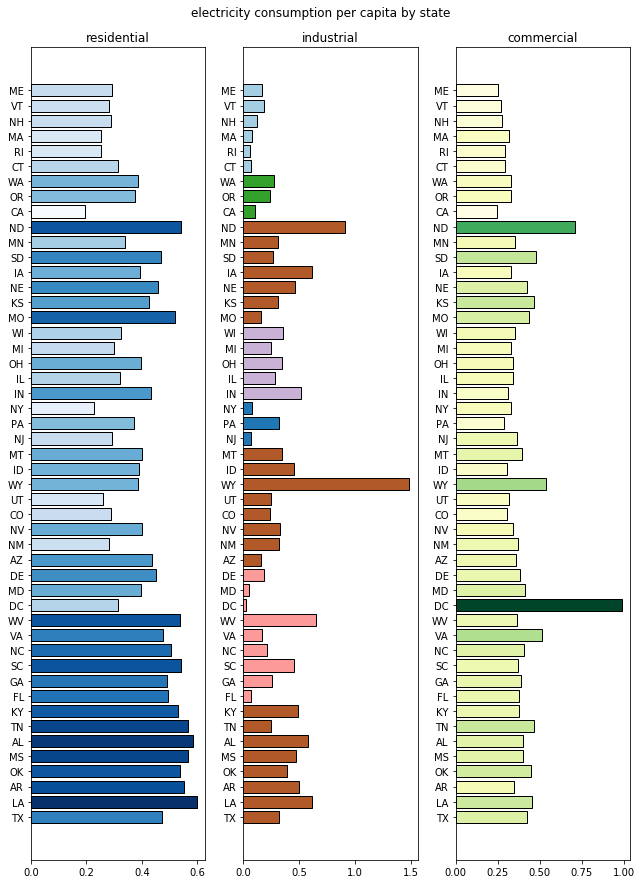

In [55]:
fig, ax = plt.subplots(1,3, figsize=(9,12))
fig.suptitle('electricity consumption per capita by state',y=1.02)
ax[0].barh(data['State'],data['Sale_RES_per_cap'],color=res_colors,edgecolor='black')
ax[0].set_xlabel('residential',size=12)
ax[0].xaxis.set_label_coords(0.5, 1.02)


ax[1].barh(data['State'],data['Sale_IND_per_cap'],color=ind_colors,edgecolor='black')
ax[1].set_xlabel('industrial',size=12)
ax[1].xaxis.set_label_coords(0.5, 1.02)

ax[2].barh(data['State'],data['Sale_COM_per_cap'],color=com_colors,edgecolor='black')
ax[2].set_xlabel('commercial',size=12)
ax[2].xaxis.set_label_coords(0.5, 1.02)


plt.tight_layout()